<a href="https://colab.research.google.com/github/andr3w1699/HumanLanguageTechnologyProject/blob/main/SentimentClassificationWithFlatVectorEmbedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset loading
Here the dataset with the training set  is loaded, the dataset contains in each raw the embedding of a sentence of the Amazon review dataset (100 features), and the label with the rating of that sentence

In [2]:
from google.colab import files
import os

# Create a custom directory if needed
os.makedirs('Dataset', exist_ok=True)

# Upload the file
uploaded = files.upload()

# Move the uploaded file to your directory
import shutil
for filename in uploaded.keys():
    shutil.move(filename, f'Dataset/{filename}')

Saving dataset_train_embeddings.csv to dataset_train_embeddings.csv


# Import of the libraries

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Dataset/dataset_train_embeddings.csv')

# Check shape and preview
print(f"Shape of DataFrame: {df.shape}")
df.head()

Shape of DataFrame: (250000, 101)


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Rating
0,0.032744,-0.167068,-0.132975,0.075244,-0.198651,0.208142,0.002468,0.270798,-0.120857,-0.106908,...,0.291426,0.058430,-0.135445,0.024991,-0.188266,0.111339,0.197360,-0.011223,0.000850,3
1,-0.068530,-0.108432,-0.102551,0.070308,-0.250629,0.296236,-0.087271,0.201177,-0.021955,-0.193456,...,0.334755,0.071870,-0.151875,0.033964,-0.094901,-0.029402,0.137434,-0.049568,-0.071807,2
2,0.018762,-0.075240,-0.132597,0.103171,-0.220575,0.225282,-0.100401,0.250748,0.005776,-0.115201,...,0.375004,0.073134,-0.136006,-0.080166,-0.066207,0.078535,-0.048979,-0.080606,0.104231,2
3,0.050064,-0.191098,-0.184570,-0.058151,-0.008091,0.148178,-0.009033,0.328290,0.004737,-0.118565,...,0.292313,0.041558,-0.289444,0.037820,-0.258467,0.050480,0.179357,0.070320,-0.040795,5
4,-0.030280,-0.072091,-0.202702,-0.001446,-0.302075,0.271846,0.063018,0.250574,-0.123610,-0.141482,...,0.489194,0.140571,-0.126699,-0.037076,-0.051469,0.086871,0.223359,-0.043732,-0.112464,2


# Neural network , Multi-class classification

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Load the data (if not done already)
# df = pd.read_csv('dataset/dataset_train_embeddings.csv')

# Separate features and labels
X = df.iloc[:, :-1].values  # Embeddings (shape: [n_samples, 100])
y = df.iloc[:, -1].values   # Ratings (1 to 5)

# Encode labels: 1–5 → 0–4
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded, num_classes=5)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Build a simple feedforward neural network
model = Sequential([
    Dense(512, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')  # 5 sentiment classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=128)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.4281 - loss: 1.2917 - val_accuracy: 0.4783 - val_loss: 1.1867
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.4786 - loss: 1.1973 - val_accuracy: 0.4893 - val_loss: 1.1674
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4837 - loss: 1.1850 - val_accuracy: 0.4908 - val_loss: 1.1663
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4891 - loss: 1.1777 - val_accuracy: 0.4896 - val_loss: 1.1626
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.4903 - loss: 1.1734 - val_accuracy: 0.4848 - val_loss: 1.1706
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4898 - loss: 1.1718 - val_accuracy: 0.4933 - val_loss: 1.1551
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4905 - loss: 1.1661 - val_accuracy: 0.4949 - val_loss: 1.1588
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.4926 - loss: 1.1649 - val_a

# Binary classification task
map the rating >= 3 --> positive rating (1) and rating < 3 in negative rating (0) and store the label in the column sentiment

In [7]:
# Create the 'Sentiment' column based on the 'Rating' column
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x >= 3 else 0)

In [8]:
X = df.iloc[:, :-2]  # All columns except the last two (Rating and Sentiment)
y = df['Sentiment']  # The Sentiment column (binary)

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
model_nn = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.7772 - loss: 0.4599 - val_accuracy: 0.7806 - val_loss: 0.4570
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.7977 - loss: 0.4249 - val_accuracy: 0.7997 - val_loss: 0.4229
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8022 - loss: 0.4182 - val_accuracy: 0.7970 - val_loss: 0.4274
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8045 - loss: 0.4139 - val_accuracy: 0.8026 - val_loss: 0.4177
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8058 - loss: 0.4120 - val_accuracy: 0.8000 - val_loss: 0.4227
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8067 - loss: 0.4089 - val_accuracy: 0.8032 - val_loss: 0.4164
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8069 - loss: 0.4094 - val_accuracy: 0.8054 - val_loss: 0.4130
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8089 - loss: 0

In [11]:
from sklearn.metrics import classification_report

# Predict the sentiment labels for the test set
y_pred = model_nn.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert predictions to binary (0 or 1)

# Print classification report
print(classification_report(y_test, y_pred_binary))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     20018
           1       0.83      0.84      0.84     29982

    accuracy                           0.80     50000
   macro avg       0.80      0.79      0.79     50000
weighted avg       0.80      0.80      0.80     50000



In [21]:
nn_accuracy = accuracy_score(y_test, y_pred_binary)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train the model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Classifier:
Accuracy: 0.6574
              precision    recall  f1-score   support

           0       0.57      0.58      0.57     20018
           1       0.72      0.71      0.71     29982

    accuracy                           0.66     50000
   macro avg       0.64      0.64      0.64     50000
weighted avg       0.66      0.66      0.66     50000



In [20]:
dt_accuracy = accuracy_score(y_test, y_pred_dt)

In [13]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.77216
              precision    recall  f1-score   support

           0       0.76      0.64      0.69     20018
           1       0.78      0.86      0.82     29982

    accuracy                           0.77     50000
   macro avg       0.77      0.75      0.76     50000
weighted avg       0.77      0.77      0.77     50000



In [18]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier:
Accuracy: 0.76968
              precision    recall  f1-score   support

           0       0.75      0.64      0.69     20018
           1       0.78      0.86      0.82     29982

    accuracy                           0.77     50000
   macro avg       0.76      0.75      0.75     50000
weighted avg       0.77      0.77      0.77     50000



In [19]:
gb_accuracy = accuracy_score(y_test, y_pred_gb)

In [15]:
import xgboost as xgb

# Train the model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Classifier:
Accuracy: 0.78994
              precision    recall  f1-score   support

           0       0.75      0.71      0.73     20018
           1       0.81      0.85      0.83     29982

    accuracy                           0.79     50000
   macro avg       0.78      0.78      0.78     50000
weighted avg       0.79      0.79      0.79     50000



In [17]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

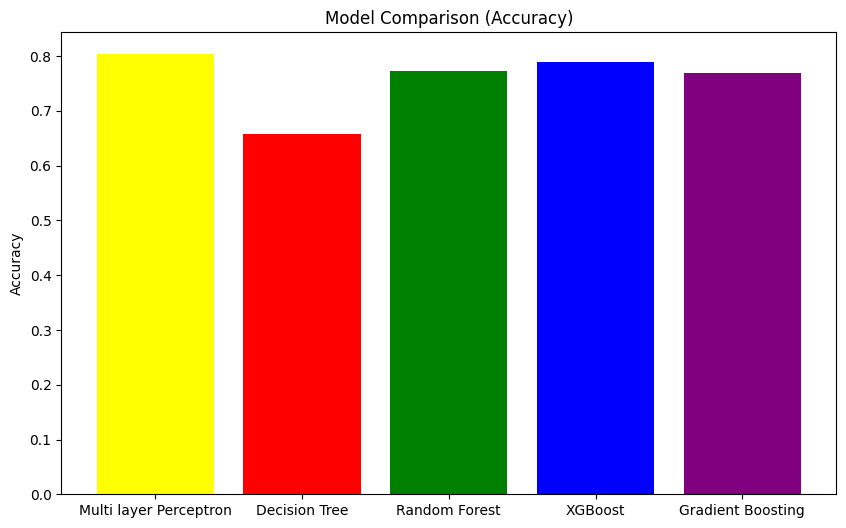

In [25]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ['Multi layer Perceptron','Decision Tree', 'Random Forest', 'XGBoost', 'Gradient Boosting']
accuracies = [nn_accuracy, dt_accuracy, rf_accuracy, xgb_accuracy, gb_accuracy]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['yellow', 'red', 'green', 'blue', 'purple'])
plt.title('Model Comparison (Accuracy)')
plt.ylabel('Accuracy')
plt.show()